## 今天的範例，帶大家運用python 裡面的套件
* 如何模擬這些分配的樣本點
* 進行一些機率的運算

包含以下離散型分配        

1. 離散均勻分配( Discrete Uniform Distribution )     
2. 伯努利分配( Bernoulli Distribution )    
3. 二項分配(Binomial Distribution)   


In [1]:
# library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics

### 1. 離散均勻分配( Discrete Uniform Distribution )

[1 2 3 4 5 6]
[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]


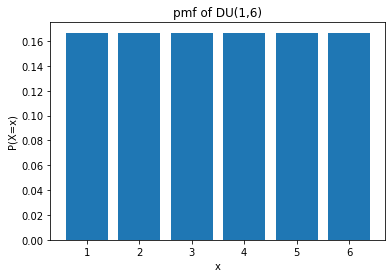

In [2]:
'''
# 離散均勻分配 (Discrete Uniform Distribution)
# 前提：其中有限個數值擁有相同的機率。
'''
# 1.定義離散均勻分配的基本資訊

low=1 
high=7
r = np.arange(low,high)
# 2.計算離散均勻分配的概率質量分佈 (probability mass function)
# 之所以稱為質量，是因為離散的點
# 產生 x 軸的點
#r = np.arange(stats.randint.ppf(0.01, low, high),
#              stats.randint.ppf(0.99, low, high),1)
print(r)
# P(X=x) --> 是機率
probs = stats.randint.pmf(r,low,high)#機率質量函數，對任何一個出現的整數值的機率是相同的
print(probs)
plt.bar(r, probs)
plt.ylabel('P(X=x)')
plt.xlabel('x')
plt.title('pmf of DU(1,6)')
plt.show()

[0.         0.16666667 0.33333333 0.5        0.66666667 0.83333333]


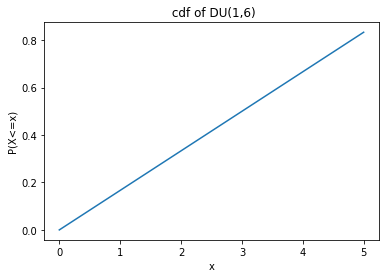

In [47]:
# 3.計算離散均勻分配的累積機率 (cumulative density function)，pmf 的累加
# P(X=x) --> 是機率
cumsum_probs = stats.randint.cdf(r, low,high)
print(cumsum_probs)
plt.ylabel('P(X<=x)')
plt.xlabel('x')
plt.title(' cdf of DU(1,6)')
plt.plot(r, cumsum_probs)
plt.show()

In [5]:
# 4.透過 cdf ，給定一個 機率值，反推出對應到的 x
k = stats.randint.ppf(cumsum_probs , low, high)
print(k)
#看上圖看結果

[1. 2. 3. 4. 5. 6.]


[2 5 5 2 1 1 2 1 4 2 3 3 2 1 3 3 6 4 4 2]
20


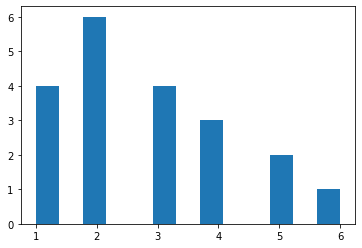

In [7]:
# 5.產生符合隨機樣本點 (random sample)
X = stats.randint.rvs(low,high,size=20)
print(X)
print(len(X))
plt.hist(X,bins=13)
plt.show()
#試試看，，每一次的結果一樣嗎?

In [8]:
#6.計算固定參數下，隨機變數的平均數、變異數、偏度和峰度。
stat_randint=stats.randint.stats(low,high,moments='mvks')
print(stat_randint)
print(type(stat_randint))
print("randint mean=",float(stat_randint[0]))
print("randint variance=",float(stat_randint[1]))
print("randint kurtosis=",float(stat_randint[2]))
print("randint skew=",float(stat_randint[3]))

(array(3.5), array(2.91666667), array(0.), array(-1.26857143))
<class 'tuple'>
randint mean= 3.5
randint variance= 2.9166666666666665
randint kurtosis= 0.0
randint skew= -1.2685714285714285


### 2. 伯努利分配( Bernoulli Distribution )

[0.6 0.4]


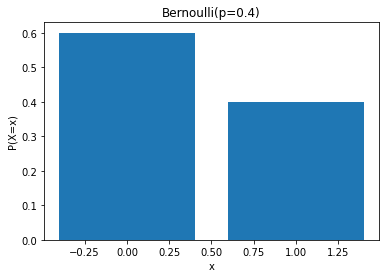

In [38]:
'''
# 伯努利分配( Bernoulli Distribution )
# 前提：是只有兩種可能結果（成功或失敗）的單次隨機試驗，成功的機率為p
'''
# ①定義伯努利分配的基本資訊

# ①定義伯努利分配基本資訊
p = 0.4 # 事件A 機率 0.4
r = np.arange(0,2) # 可以出現的範圍為 0、1,2種可能出現的結果

# ②計算二項分佈的概率質量分佈 (probability mass function)
# 之所以稱為質量，是因為離散的點
# P(X=x) --> 是機率
probs = stats.bernoulli.pmf(r,p)
print(probs)
#array([ 0.07776, 0.2592 , 0.3456 , 0.2304 , 0.0768 , 0.01024])
plt.bar(r, probs)
plt.ylabel('P(X=x)')
plt.xlabel('x')
plt.title('Bernoulli(p=0.4)')
plt.show()


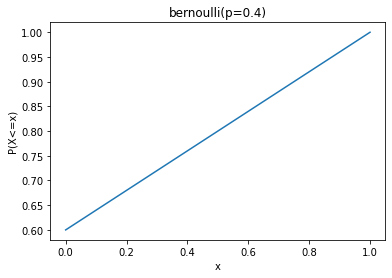

In [17]:
# ③計算伯努利分配的累積機率 (cumulative density function)，pmf 的累加
# P(X=x) --> 是機率
cumsum_probs = stats.bernoulli.cdf(r,p)
plt.ylabel('P(X<=x)')
plt.xlabel('x')
plt.title('bernoulli(p=0.4)')
plt.plot(r, cumsum_probs)
plt.show()

In [22]:
# ④ 透過 cdf ，給定一個 機率值，反推出對應到的 x
p_loc = stats.bernoulli.ppf(cumsum_probs, p)
print(p_loc)
#看上圖看結果

[0. 1.]


[1 0 0 1 0 0 1 0 0 1 0 1 1 1 0 0 0 0 1 1]


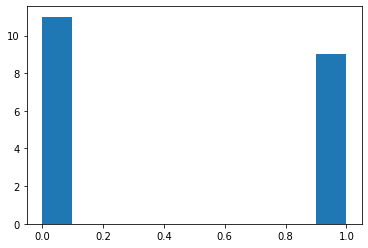

In [31]:
# ⑤產生符合伯努利分配的隨機樣本點 (random sample)
X = stats.bernoulli.rvs(p,size=20)
print(X)
plt.hist(X)
plt.show()
#試試看，每一次的結果一樣嗎?

In [32]:
#6.計算固定參數下，隨機變數的平均數、變異數、偏度和峰度。
stat_ber=stats.bernoulli.stats(p,moments='mvks')
print(stat_ber)
print(type(stat_ber))
#E(X)
print("bernoulli mean=",float(stat_ber[0]))
print("bernoulli variance=",float(stat_ber[1]))
print("bernoulli kurtosis=",float(stat_ber[2]))
print("bernoulli skew=",float(stat_ber[3]))

(array(0.4), array(0.24), array(0.40824829), array(-1.83333333))
<class 'tuple'>
bernoulli mean= 0.4
bernoulli variance= 0.24
bernoulli kurtosis= 0.40824829046386296
bernoulli skew= -1.8333333333333337


### 3. 二項分配(Binomial Distribution)

[3.05493636e-151 1.52746818e-148 3.81103311e-146 6.32631497e-144
 7.86044635e-142 7.79756278e-140 6.43298929e-138 4.53985244e-136
 2.79768407e-134 1.52940062e-132 7.50935706e-131 3.34507724e-129
 1.36311897e-127 5.11693892e-126 1.77996375e-124 5.76708256e-123
 1.74814690e-121 4.97707706e-120 1.33551568e-118 3.38799240e-117
 8.14812173e-116 1.86242782e-114 4.05501331e-113 8.42737548e-112
 1.67494088e-110 3.18908743e-109 5.82621742e-108 1.02282484e-106
 1.72784338e-105 2.81221406e-104 4.41517607e-103 6.69397662e-102
 9.81085949e-101 1.39135825e-099 1.91107149e-098 2.54445518e-097
 3.28658794e-096 4.12155893e-095 5.02179417e-094 5.94889463e-093
 6.85610106e-092 7.69221094e-091 8.40648767e-090 8.95388687e-089
 9.29983250e-088 9.42383027e-087 9.32139733e-086 9.00407316e-085
 8.49759405e-084 7.83859696e-083 7.07041446e-082 6.23860099e-081
 5.38679201e-080 4.55336381e-079 3.76917338e-078 3.05645696e-077
 2.42879169e-076 1.89190090e-075 1.44502086e-074 1.08254105e-073
 7.95667670e-073 5.739242

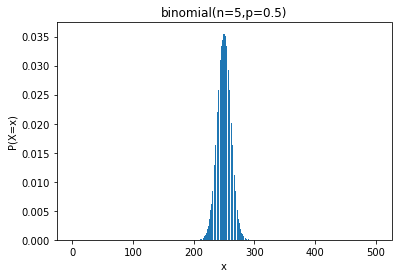

In [52]:
'''
# 二項分佈 (binomial distribution)
# 前提：獨立重複試驗、有放回、只有兩個結果
# 二項分佈指出，隨機一次試驗出現事件A的機率如果為p，那麼在重複 n 次試驗中出現 x 次事件A的機率為：
# f(n,x,p) = choose(n, x) * p**x * (1-p)**(n-x)
'''
# 1.定義二項分佈的基本資訊
p = 0.5 # 事件A 機率 0.4
n = 500 # 重複實驗5次,
r = np.arange(0,n+1) # 可以出現的範圍為 0,1,2,...,5-->6種可能出現的結果 ，!!!也可以為單一結果
#print(type(k))

# 2.計算二項分佈的概率質量分佈 (probability mass function)
# 之所以稱為質量，是因為離散的點
# P(X=x) --> 是機率
probs = stats.binom.pmf(r, n, p)
print(probs)
#array([ 0.07776, 0.2592 , 0.3456 , 0.2304 , 0.0768 , 0.01024])
plt.bar(r, probs)
plt.ylabel('P(X=x)')
plt.xlabel('x')
plt.title('binomial(n=5,p=0.5)')
plt.show()

#學生額外小練習: 可以調整 p 的不同值，p接近於1 時，p=0.5, p 接近於 0時，看 pmf 的變化。

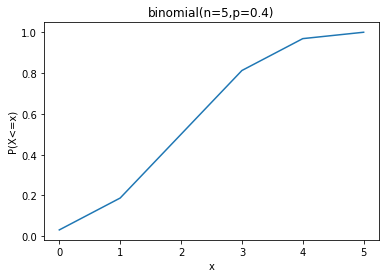

In [34]:
# 3.計算二項分佈的累積機率 (cumulative density function)，pmf 的累加
# 之所以稱為質量，是因為離散的點，預設體積（即寬度）為1
# P(X=x) --> 是機率
cumsum_probs = stats.binom.cdf(r, n, p)
#array([ 0.07776, 0.2592 , 0.3456 , 0.2304 , 0.0768 , 0.01024])
plt.show()
plt.ylabel('P(X<=x)')
plt.xlabel('x')
plt.title('binomial(n=5,p=0.4)')
plt.plot(r, cumsum_probs)
plt.show()

In [35]:
# 4.透過 cdf ，給定一個 機率值，反推出對應到的 x
p_loc= stats.binom.ppf(cumsum_probs, n, p)
print(p_loc)
#看上圖看結果

[0. 1. 2. 3. 4. 5.]


[2 3 2 1 2 3 0 1 0 4 2 2 4 2 2 2 2 4 2 3]


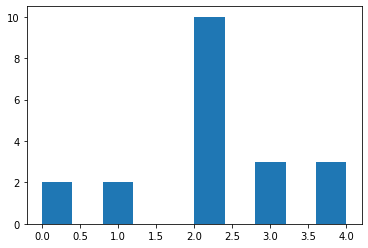

In [36]:
# 5.產生符合二項分佈的隨機樣本點 (random sample)
X = stats.binom.rvs(n,p,size=20)
#array([2, 3, 1, 2, 2, 2, 1, 2, 2, 3, 3, 0, 1, 1, 1, 2, 3, 4, 0, 3])
print(X)
plt.hist(X)
plt.show()
#試試看，，每一次的結果一樣嗎?

In [37]:
#6.計算固定參數下，隨機變數的平均數、變異數、偏度和峰度。
stat_bin=stats.binom.stats(n,p,moments='mvks')
print(stat_bin)
print(type(stat_bin))
#E(X)
print("binomial mean=",float(stat_bin[0]))
print("binomial variance=",float(stat_bin[1]))
print("binomial kurtosis=",float(stat_bin[2]))
print("binomial skew=",float(stat_bin[3]))

(array(2.5), array(1.25), array(0.), array(-0.4))
<class 'tuple'>
binomial mean= 2.5
binomial variance= 1.25
binomial kurtosis= 0.0
binomial skew= -0.4
